In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## 데이터 불러오기 ##

Dataurl = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(Dataurl, index_col=0)
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [2]:
## 각 column들의 dtype 확인 및 데이터 구조 파악 ##
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [3]:
## 장르별 value 수 ##

# Action > Sports > Misc > Role-Playing 순으로 다수작품 발매
df.Genre.value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

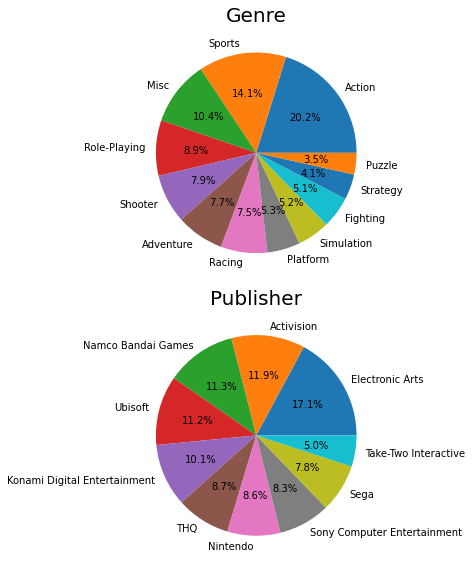

In [168]:
## 장르별 Pie차트 ##


## Genre별 Count수를 list로 변환
label = df.Genre.value_counts().index.to_list() # to_list: Series를 list형식으로 변환
## Genre별 Count수의 index를 list로 변환
Genre_value_count = df.Genre.value_counts().to_list() #to_list: Series를 list형식으로 변환

## pie 차트의 x값과, label 값은 list 형식으로 부여해야 Error 생기지 않음 ##
## Genre에 빈도수를 list형식으로 모두 전환하여 변수에 저장 ##
plt.figure(figsize = (9,8))
plt.subplot(2,1,1)
plt.title('Genre',fontsize = 20)
plt.pie(Genre_value_count,labels = label,autopct='%.1f%%') ## autopct: 소수점 한자리까지 표현


## Publisher별 Pie차트 ##

## Publisher별 Count수를 list로 변환
Pub_label = df.Publisher.value_counts().head(10).index.to_list() # to_list: Series를 list형식으로 변환
## Publisher별 Count수의 index를 list로 변환
Pub_value_count = df.Publisher.value_counts().head(10).to_list() #to_list: Series를 list형식으로 변환

## pie 차트의 x값과, label 값은 list 형식으로 부여해야 Error 생기지 않음 ##
## Genre에 빈도수를 list형식으로 모두 전환하여 변수에 저장 ##
plt.subplot(2,1,2)
plt.title('Publisher',fontsize = 20)
plt.pie(Pub_value_count,labels = Pub_label,autopct='%.1f%%') ## autopct: 소수점 한자리까지 표현

plt.tight_layout()
plt.show()

In [7]:
## 결측value 확인##

## Year Columns에서의 결측value 확인 -> NaN
df.loc[df['Year'].isnull(),'Year']

## Genre Columns에서의 결측 value 확인 -> NaN
df.loc[df['Genre'].isnull(),'Genre']

## Publisher Columns에서의 결측 value 확인 -> NaN
df.loc[df['Publisher'].isnull(),'Publisher']

## 동시에 Year, Publisher, Genre 결측치는 없음
df.loc[(df['Publisher'].isnull())&(df['Genre'].isnull())&(df['Year'].isnull())]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [9]:
## 시계열 기준 장르들의 추이
## 시계열 기준 지역별 매출추이

## Year 이상값 확인 후 대체 진행
##### ※df['Year']의 dataType이 Float여서 
##### float -> datetime 변경 후 다시 year만 추출하는 과정에서
##### 최종 결과가 float로 반환되었다.... 약 2시간에 걸쳐 작업했던 코드가 별 쓸모 없었던거 였음

## Year의 이상value들을 확인 후 이에 대한 정상값으로 변환 ##
year_index = df['Year'].value_counts().sort_index(ascending = True).index ## (value / 1000) 해서 1이하인 값들만 모아서 
def normal_year(df,year_index):
  for year_in in year_index:
    if (year_in//1000) < 1:
      if  (year_in //50) >= 1:
        df.loc[df['Year']==year_in, 'Year'] = (year_in + 1900)
      # df[df['Year']==year_in].map(lambda x: (2000 + x) if (x/80) < 1 else (1900+x),na_action='ignore') ## na_action: NaN값이 포함되어 있을 때 Na 값을 어떻게 처리해야 되는지
      else:
        df.loc[df['Year']==year_in, 'Year'] = (year_in + 2000)
    else:
      df['Year']
  return df['Year']

normal_year(df,year_index)

1        2008.0
2        2009.0
3        2010.0
4        2010.0
5        2010.0
          ...  
16594    2006.0
16595    2005.0
16596    2015.0
16597    2013.0
16598    1996.0
Name: Year, Length: 16598, dtype: float64

In [11]:
## 수치 데이터에서의 K / M / B/ T의 의미
## (1) K - kilo = 1,000 (일천)
## (2) M - Million = 1,000,000 (백만)
## (3) Billion = 1,000,000,000 (십억)
## (4) Trillion = 1,000,000,000,000 (일조)

### 0.0 과같은 소수형: M -> 변수 * 1000000
### 480과 같은 정수형: K -> 변수 * 1000

##### 출고량 데이터의 함정 #####
# (1) K / M에 대한 데이터를 처리
# (2) 소수점 / 소수점이 있는 String 처리
# (3) 00. / 0. 소수점 이전이 십의자리 or 일의자리 나타내는지에 대한 처리
# (4) 0 ~ 9까지의 문자열 숫자: data의 패턴을 살펴볼 때, 한자리수 or 정수형 문자데이터는 1000을 곱함

# 출고량 추출함수##
def numeric_change(df,area):
  temp_M = 0
  temp_K = 0
  temp_value = 0
  temp_M2 = 0
  temp_K2 = 0
  M = 1000000
  K = 1000
  for value in df[area].unique():
    # print(value) ## 어떤 value 값에서 오류가 났는지 중간확인을 위해
    if ('M' in value) == True:
      temp_M= pd.to_numeric(value.replace('M','')) ## M을 공백으로 대체 후 numeric(수치형 데이터로 변환)
      df.loc[df[area]==value,area] = temp_M * M ## M의 약자는 1,000,000이기 때문에 1000000을 곱해줌
    elif ('K' in value) == True:
      temp_K= pd.to_numeric(value.replace('K','')) ## K을 공백으로 대체 후 numeric(수치형 데이터로 변환)
      df.loc[df[area]==value,area] = temp_K * K ## M의 약자는 1,000이기 때문에 1000을 곱해줌
    elif len(value) <= 2: ## 문자열의 수가 1인 문자는 1000을 곱해줌
      temp_value = pd.to_numeric(value)
      df.loc[df[area]==value,area] = temp_value * K
    elif value.index('.') <= 2: ## index('.'), find('.')으로 .위치의 인덱스를 찾음, '.'위치가 2이하라면 M을 곱해줌
      temp_M2 = pd.to_numeric(value)
      df.loc[df[area]==value,area] = temp_M2*M
    else:
      temp_K2 = pd.to_numeric(value)
      df.loc[df[area]==value,area] = temp_K2*K
  return pd.to_numeric(df[area])



In [12]:
## 북미지역 출고량 ##
numeric_change(df,'NA_Sales')

1         40000.0
2        170000.0
3             0.0
4         40000.0
5        120000.0
           ...   
16594    150000.0
16595     10000.0
16596    440000.0
16597     50000.0
16598         0.0
Name: NA_Sales, Length: 16598, dtype: float64

In [13]:
## 유럽지역 출고량 ##
numeric_change(df,'EU_Sales')

1             0.0
2             0.0
3             0.0
4             0.0
5         90000.0
           ...   
16594     40000.0
16595         0.0
16596    190000.0
16597     50000.0
16598         0.0
Name: EU_Sales, Length: 16598, dtype: float64

In [14]:
## 일본지역 출고량 ##
# df['JP_Sales']
numeric_change(df,'JP_Sales')


1             0.0
2             0.0
3         20000.0
4             0.0
5             0.0
           ...   
16594         0.0
16595         0.0
16596     30000.0
16597    250000.0
16598    160000.0
Name: JP_Sales, Length: 16598, dtype: float64

In [15]:
## 그 외 지역 출고량 ##
# df['Other_Sales']
numeric_change(df,'Other_Sales')

1             0.0
2         10000.0
3             0.0
4             0.0
5         40000.0
           ...   
16594     10000.0
16595         0.0
16596    130000.0
16597     30000.0
16598     10000.0
Name: Other_Sales, Length: 16598, dtype: float64

In [19]:
import numpy as np
# Action 20%
# Sports 14.1%
# Misc 10.5%
# Role-playing 9%
# Shooter 7.9%
# Adventure 7.7%
# Racing 7.5%
# platform 5.3%
# Simulation 5.2
# Fighting 5.1
# Strategy 4.1%
# Puzzle 3.5%

## 범주형 데이터의 NaN값을 각 범주가 차지하는 비율로 균일하게 부여##
## 장르용 함수 ##
def genre_fill_na(df,feature): # parameter로 Feature를 부여
  # generate random number from nuniform distribution
  rnd_num = np.random.uniform(0,1,100)
  for i in df.loc[df[feature].isnull(),feature].index:
    for j in rnd_num:
      if j > (100- 3.5)/100:
        df.iloc[(i-1),3] = 'Puzzle'
      elif j > ((100- 4.1)/100)+((100- 3.5)/100):
        df.iloc[(i-1),3] = 'Strategy'
      elif j > ((100 - 5.1)/100)+((100- 4.1)/100)+((100- 3.5)/100):
        df.iloc[(i-1),3] = 'Fighting'
      elif j > ((100 - 5.2)/100)+((100 - 5.1)/100)+((100- 4.1)/100)+((100- 3.5)/100):
        df.iloc[(i-1),3] = 'Simulation'
      elif j > ((100 - 5.3)/100)+((100 - 5.2)/100)+((100 - 5.1)/100)+((100- 4.1)/100)+((100- 3.5)/100):
        df.iloc[(i-1),3] = 'Plaform'
      elif j > ((100 - 7.5)/100)+((100 - 5.3)/100)+((100 - 5.2)/100)+((100 - 5.1)/100)+((100- 4.1)/100)+((100- 3.5)/100):
        df.iloc[(i-1),3] = 'Racing'
      elif j > ((100 - 7.7)/100)+((100 - 7.5)/100)+((100 - 5.3)/100)+((100 - 5.2)/100)+((100 - 5.1)/100)+((100- 4.1)/100)+((100- 3.5)/100):
        df.iloc[(i-1),3] = 'Adventure'
      elif j > ((100 - 7.9)/100)+((100 - 7.7)/100)+((100 - 7.5)/100)+((100 - 5.3)/100)+((100 - 5.2)/100)+((100 - 5.1)/100)+((100- 4.1)/100)+((100- 3.5)/100):
        df.iloc[(i-1),3] = 'Shooter'
      elif j > ((100 - 9)/100)+((100 - 7.9)/100)+((100 - 7.7)/100)+((100 - 7.5)/100)+((100 - 5.3)/100)+((100 - 5.2)/100)+((100 - 5.1)/100)+((100- 4.1)/100)+((100- 3.5)/100):
        df.iloc[(i-1),3] = 'Role-playing'
      elif j > ((100 - 10.5)/100)+((100 - 9)/100)+((100 - 7.9)/100)+((100 - 7.7)/100)+((100 - 7.5)/100)+((100 - 5.3)/100)+((100 - 5.2)/100)+((100 - 5.1)/100)+((100- 4.1)/100)+((100- 3.5)/100):
        df.iloc[(i-1),3] = 'Misc'
      elif j > ((100 - 14.1)/100)+((100 - 10.5)/100)+((100 - 9)/100)+((100 - 7.9)/100)+((100 - 7.7)/100)+((100 - 7.5)/100)+((100 - 5.3)/100)+((100 - 5.2)/100)+((100 - 5.1)/100)+((100- 4.1)/100)+((100- 3.5)/100):
        df.iloc[(i-1),3] = 'Sports'
      else:
        df.iloc[(i-1),3] = 'Action'
  return df[feature]



In [20]:
genre_fill_na(df,'Genre')

1           Action
2           Action
3        Adventure
4             Misc
5         Platform
           ...    
16594     Platform
16595       Action
16596       Sports
16597       Action
16598     Fighting
Name: Genre, Length: 16598, dtype: object

In [22]:
df['Publisher'].value_counts().head(10)

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: Publisher, dtype: int64

In [23]:
# Electronic Arts 16.5%
# Activision 11.9%
# Namco Bandai Games 11.4%
# Ubisoft 11.3%
# Konami Digital Entertainment 10.2%
# THQ 8.8%
# Nintendo 8.6%
# Sony Computer Entertainment 8.4%
# Sega 7.8%
# Take-Two Interactive 5.1%

## 범주형 데이터의 NaN값을 각 범주가 차지하는 비율로 균일하게 부여##
## Publisher용 함수 ##
def Pub_fill_na(df,feature): # parameter로 Feature를 부여
  # generate random number from nuniform distribution
  rnd_num = np.random.uniform(0,1,100)
  for i in df.loc[df[feature].isnull(),feature].index:
    for j in rnd_num:
      if j > (100- 5.1)/100:
        df.iloc[(i-1),4] = 'Take-Two Interactive'
      elif j > ((100- 7.8)/100)+((100- 5.1)/100):
        df.iloc[(i-1),4] = 'Sega'
      elif j > ((100 - 8.4)/100)+((100- 7.8)/100)+((100- 5.1)/100):
        df.iloc[(i-1),4] = 'Sony Computer Entertainment'
      elif j > ((100 - 8.6)/100)+((100 - 8.4)/100)+((100- 7.8)/100)+((100- 5.1)/100):
        df.iloc[(i-1),4] = 'Nintendo'
      elif j > ((100 - 8.8)/100)+((100 - 8.6)/100)+((100 - 8.4)/100)+((100- 7.8)/100)+((100- 5.1)/100):
        df.iloc[(i-1),4] = 'THQ'
      elif j > ((100 - 10.2)/100)+((100 - 8.8)/100)+((100 - 8.6)/100)+((100 - 8.4)/100)+((100- 7.8)/100)+((100- 5.1)/100):
        df.iloc[(i-1),4] = 'Konami Digital Entertainment'
      elif j > ((100 - 11.3)/100)+((100 - 10.2)/100)+((100 - 8.8)/100)+((100 - 8.6)/100)+((100 - 8.4)/100)+((100- 7.8)/100)+((100- 5.1)/100):
        df.iloc[(i-1),4] = 'Ubisoft'
      elif j > ((100 - 11.4)/100)+((100 - 11.3)/100)+((100 - 10.2)/100)+((100 - 8.8)/100)+((100 - 8.6)/100)+((100 - 8.4)/100)+((100- 7.8)/100)+((100- 5.1)/100):
        df.iloc[(i-1),4] = 'Namco Bandai Games'
      elif j > ((100 - 11.9)/100)+((100 - 11.4)/100)+((100 - 11.3)/100)+((100 - 10.2)/100)+((100 - 8.8)/100)+((100 - 8.6)/100)+((100 - 8.4)/100)+((100- 7.8)/100)+((100- 5.1)/100):
        df.iloc[(i-1),4] = 'Activision'
      else:
        df.iloc[(i-1),4] = 'Electronic Arts'
  return df[feature]

In [24]:
Pub_fill_na(df,'Publisher')

1                          Destineer
2                 Namco Bandai Games
3                          Alchemist
4                          Zoo Games
5                        D3Publisher
                    ...             
16594                  Vivendi Games
16595              Rising Star Games
16596           Take-Two Interactive
16597                     Tecmo Koei
16598    Sony Computer Entertainment
Name: Publisher, Length: 16598, dtype: object

In [25]:
## Year 결측값 대체 ##
## 각 데이터 Column들의 결측값 확인##
Y_index = df.loc[df['Year'].isnull(),'Year'].index
print(Y_index)
for i in Y_index:

  df.iloc[i-1,2] = round(df['Year'].median(),0)

Int64Index([   32,   110,   274,   359,   431,   549,   676,   809,   819,
              953,
            ...
            15806, 15898, 16054, 16131, 16196, 16241, 16276, 16279, 16426,
            16433],
           dtype='int64', length=271)


In [26]:
## 결측치 대체 완료 ##
## 결측값 임의 삭제하지 않았음 ##

print(df.Year.isnull().sum())
print(df.Genre.isnull().sum())
print(df.Publisher.isnull().sum())
print()

0
0
0



In [27]:
## Total_Sales로 전체지역 출고량 Feature 생성 ##
df['Total_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

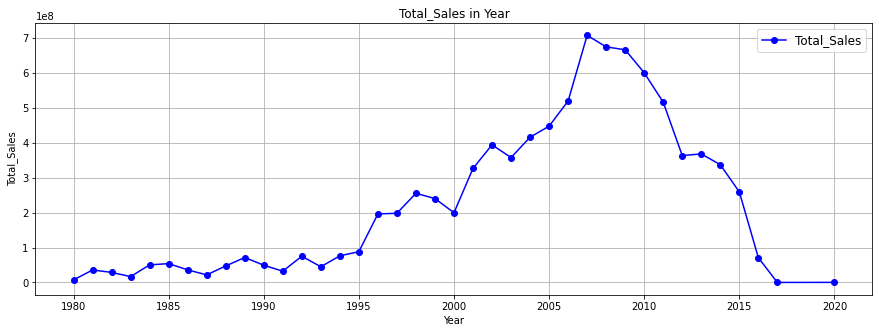

In [28]:
## Groupby를 통해 연도만 추출
group_yt = df[['Year','Total_Sales']].groupby('Year', as_index=False)['Total_Sales'].sum().sort_values('Year',ascending=True)
group_year = group_yt.iloc[:,0]

## Groupby를 통 연도별 Total_Sales만 추출
group_total_sales = group_yt.iloc[:,1]

## 2006년도에 총 출고량이 중 outlier 발견 ##
plt.figure(figsize=(15,5))
plt.title('Total_Sales in Year')
plt.plot(group_year,group_total_sales, 'o-',color = 'blue', label='Total_Sales')
plt.grid() ## x, y축에 격자 생성
plt.legend(fontsize=12, loc='best')
plt.xlabel('Year')
plt.ylabel('Total_Sales')
plt.show()


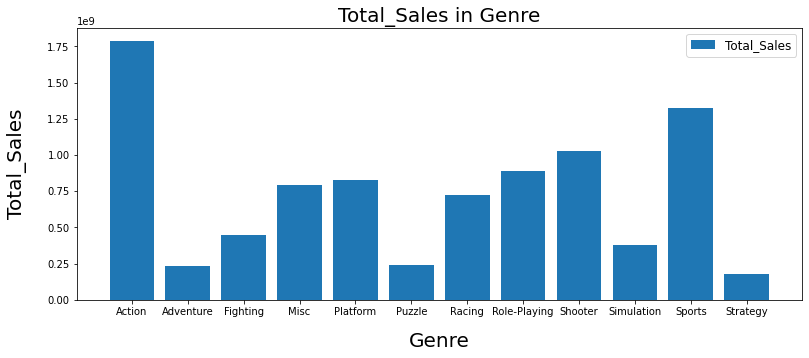

In [149]:
group_gt=df[['Genre','Total_Sales']].groupby('Genre',as_index=False)['Total_Sales'].sum().sort_values('Genre',ascending=True)
group_genre = np.array(group_gt.iloc[:,0])
group_to = np.array(group_gt.iloc[:,1])

plt.figure(figsize=(13,5))
plt.title('Total_Sales in Genre',fontsize=20)
plt.bar(group_genre,group_to, label='Total_Sales')
plt.legend(fontsize=12, loc='best') ## ncol = 열 개수 지정하기
plt.xlabel('Genre', fontsize=20,labelpad= 15)
plt.ylabel('Total_Sales', fontsize=20,labelpad = 20)
plt.show()

In [30]:
df.sort_values('Total_Sales',ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4200,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3353,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000,30381000.0
...,...,...,...,...,...,...,...,...,...,...
10767,Arslan: The Warriors of Legend,XOne,2016.0,Action,Tecmo Koei,10000.0,0,0,0,10000.0
1443,Puzzle Quest: Challenge of the Warlords,PSP,2007.0,Puzzle,D3Publisher,10000.0,0,0,0,10000.0
8310,WRC 5: FIA World Rally Championship,XOne,2015.0,Sports,Bigben Interactive,0,10000.0,0,0,10000.0
3925,Jissen Pachi-Slot Hisshouhou: Hokuto no Ken,PS2,2004.0,Misc,Sammy Corporation,0,0,1000,0,1000


In [31]:
## 장르별 총 출고량 ##
df_Genre = df[['Genre','Total_Sales']]
print(df_Genre.groupby('Genre').Total_Sales.sum(),'\n')
print(round(df_Genre.groupby('Genre').Total_Sales.mean(),1),'\n')
print(round(df.groupby(['Year','Platform'],as_index=False).Total_Sales.sum().sort_values('Year',ascending=True).reset_index(drop=True),1))

Genre
Action          1787476000.0
Adventure        234474000.0
Fighting         446402000.0
Misc             791728000.0
Platform         826234000.0
Puzzle           240473000.0
Racing           721796000.0
Role-Playing     892043000.0
Shooter         1028907000.0
Simulation       379502000.0
Sports          1325042000.0
Strategy         174840000.0
Name: Total_Sales, dtype: object 

Genre
Action          532779.7
Adventure       183182.8
Fighting        527039.0
Misc            456590.5
Platform        934653.8
Puzzle          416043.3
Racing          580688.7
Role-Playing    601512.5
Shooter         786626.1
Simulation      438730.6
Sports          566015.4
Strategy        257117.6
Name: Total_Sales, dtype: float64 

       Year Platform  Total_Sales
0    1980.0     2600    7384000.0
1    1981.0     2600   35680000.0
2    1982.0     2600   28880000.0
3    1983.0     2600    5840000.0
4    1983.0      NES   10960000.0
..      ...      ...          ...
242  2016.0     WiiU    3280000

In [89]:
## 지역에따라 선호하는 게임 장르는?
genre_area = round(df.groupby('Genre',as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values('Genre',ascending=True).reset_index(drop=True),1)
# round(df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().sort_values('NA_Sales',ascending=False),1)
## 평균: NA_Sales > Platform / 합계: NA_Sales > Action
## 평균: EU_Sales > Shooter / 합계: EU_Sales > Action 
## 평균: JP_Sales > Role-Playing / 합계: JP_Sales > Role-Playing
## 평균: Other_Sales > Shooter / 합계: Other_Sales > Action
genre_name = np.array(genre_area.iloc[:,0])
genre_na_value= np.array(genre_area.iloc[:,1])
genre_eu_value= np.array(genre_area.iloc[:,2])
genre_jp_value= np.array(genre_area.iloc[:,3])
genre_ot_value= np.array(genre_area.iloc[:,4])
genre_min = genre_area.iloc[:,1].min()
genre_max = genre_area.iloc[:,1].max()


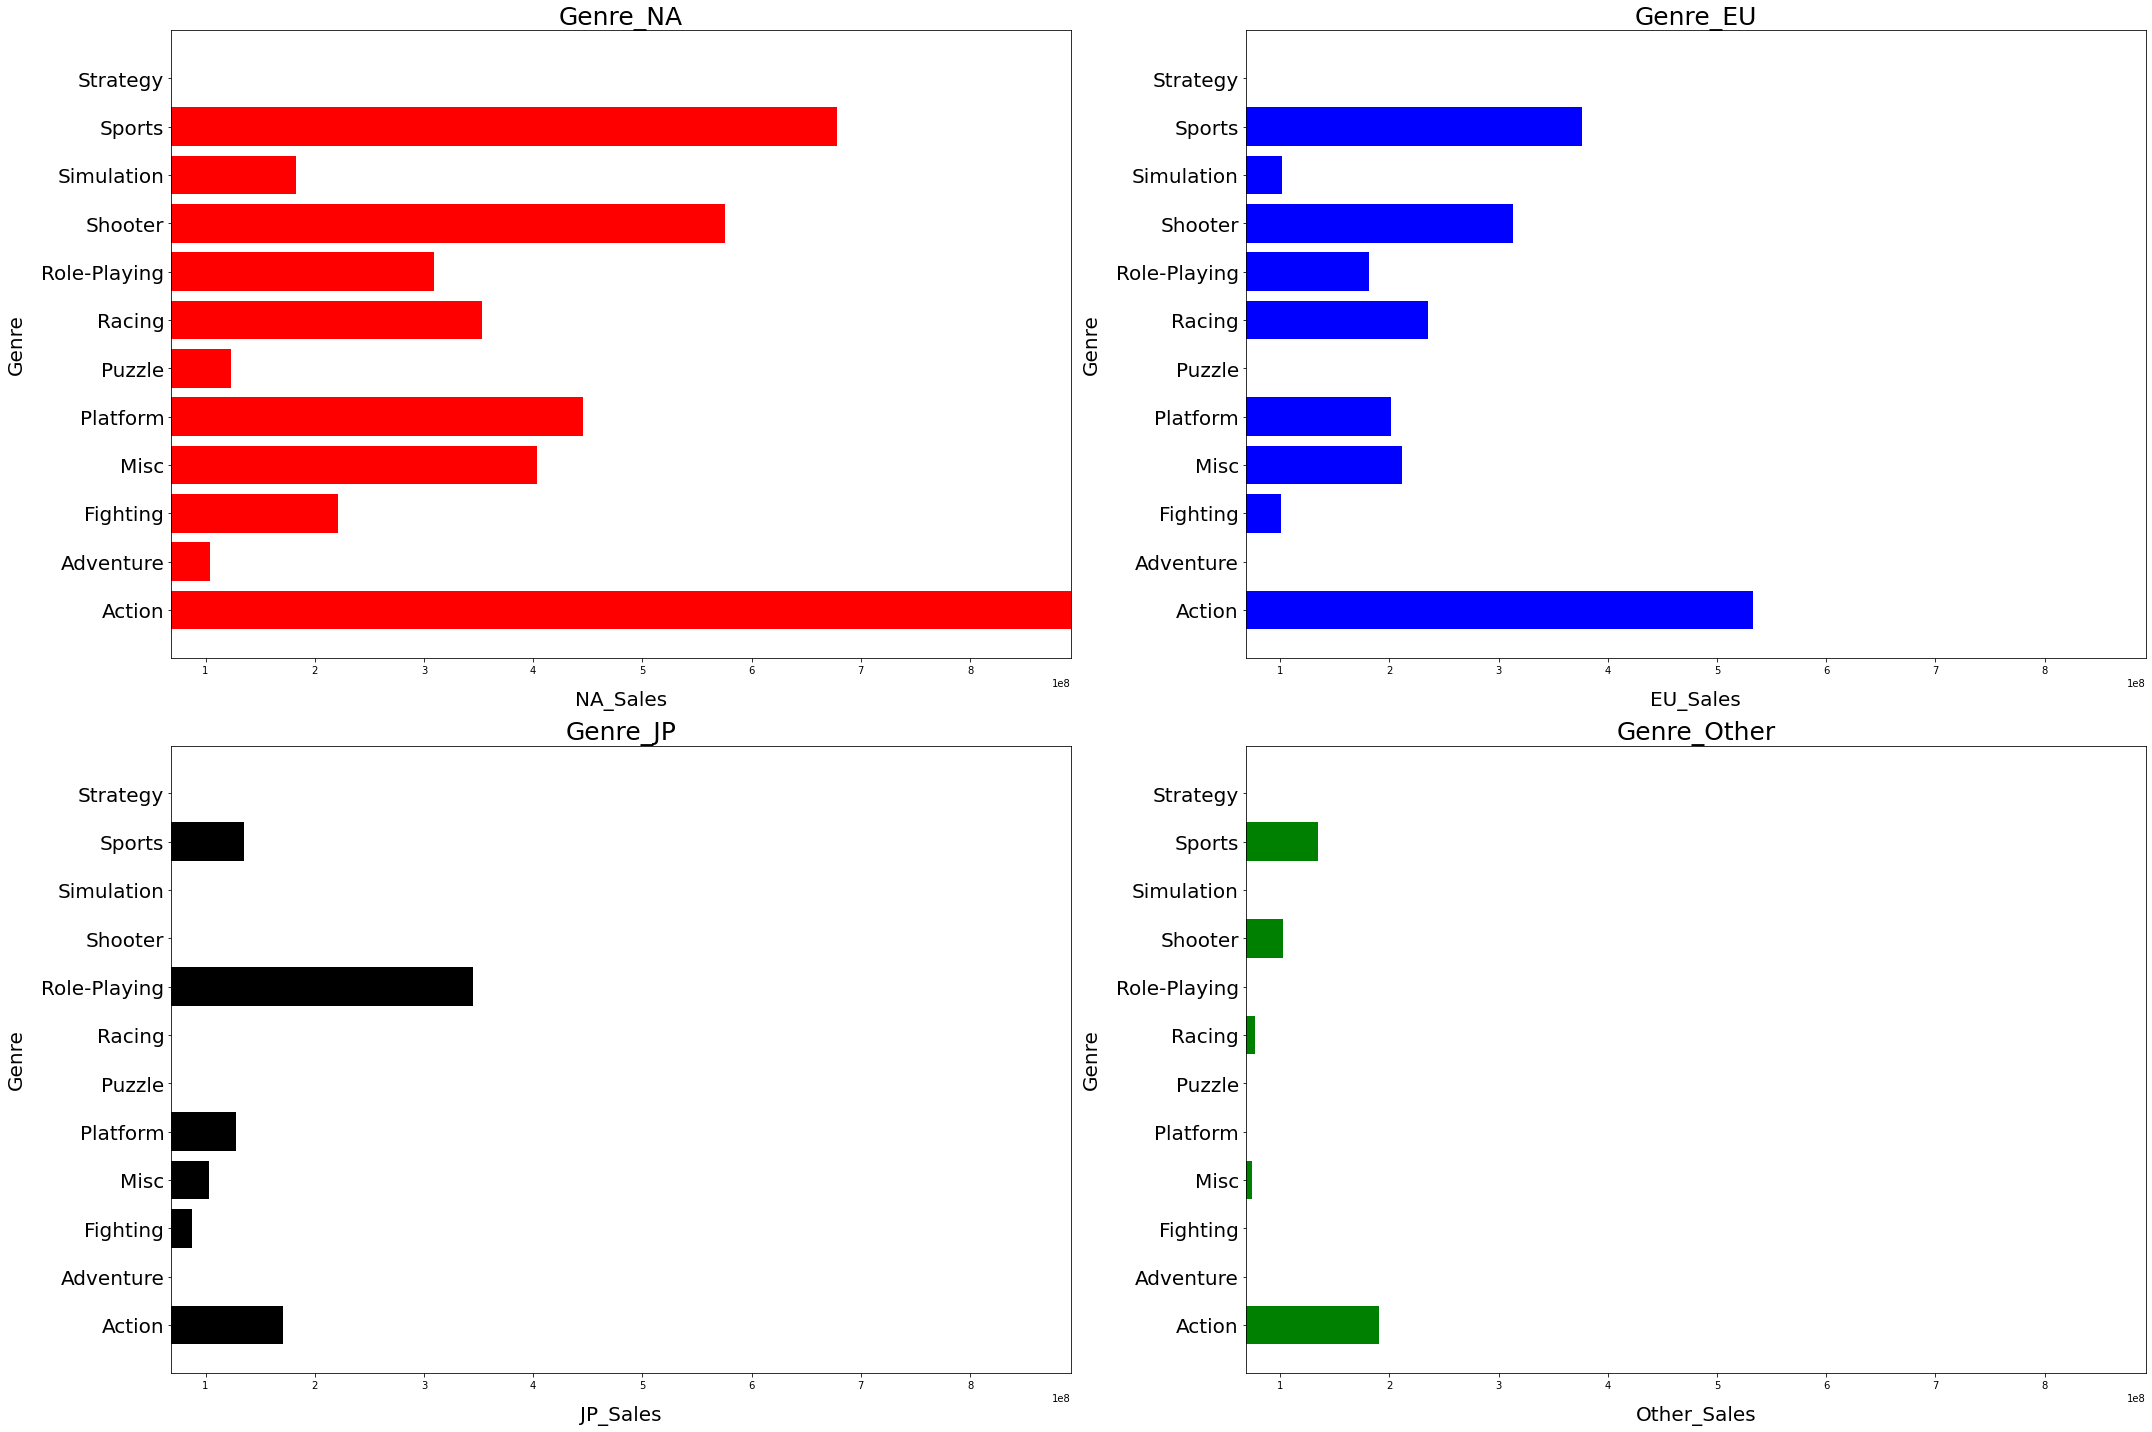

In [91]:
x = np.arange(len(genre_name))
plt.figure(figsize=(30,20))
plt.subplot(2,2,1) ## NA
plt.title('Genre_NA',fontsize=25)
plt.barh(x,genre_na_value,color='r')
plt.xlabel('NA_Sales',labelpad=15,fontsize=20)
plt.ylabel('Genre',labelpad=15,fontsize=20)
plt.xlim(genre_min,genre_max)
plt.yticks(x,genre_name, fontsize=20)

plt.subplot(2,2,2) ## EU
plt.title('Genre_EU',fontsize=25)
plt.barh(x,genre_eu_value,color='b')
plt.xlabel('EU_Sales',labelpad=15,fontsize=20)
plt.ylabel('Genre',labelpad=15,fontsize=20)
plt.xlim(genre_min,genre_max)
plt.yticks(x,genre_name, fontsize=20)

plt.subplot(2,2,3) ## JP
plt.title('Genre_JP',fontsize=25)
plt.barh(x,genre_jp_value,color='black')
plt.xlabel('JP_Sales',labelpad=15,fontsize=20)
plt.ylabel('Genre',labelpad=15,fontsize=20)
plt.xlim(genre_min,genre_max)
plt.yticks(x,genre_name, fontsize=20)

plt.subplot(2,2,4) ## Other
plt.title('Genre_Other',fontsize=25)
plt.barh(x,genre_ot_value,color='g')
plt.xlabel('Other_Sales',labelpad=15,fontsize=20)
plt.ylabel('Genre',labelpad=15,fontsize=20)
plt.xlim(genre_min,genre_max)
plt.yticks(x,genre_name, fontsize=20)

plt.tight_layout()
plt.show()

In [34]:
## NA 지역 Platform장르 최고 매출 게임 ##
df.groupby('Genre')[['Name','Platform','NA_Sales']].max()

,Name,Platform,NA_Sales
Genre,,,
Action,inFAMOUS: Second Son,XOne,9630000.0
Adventure,iCarly 2: iJoin The Click!,XOne,6160000.0
Fighting,wwe Smackdown vs. Raw 2006,XOne,6750000.0
Misc,uDraw Studio: Instant Artist,XOne,14970000.0
Platform,¡Shin Chan Flipa en colores!,XOne,29080000.0
Puzzle,th!nk Logic Trainer,XB,23200000.0
Racing,nail'd,XOne,15850000.0
Role-Playing,Zwei!!,XOne,11270000.0
Shooter,Zone of the Enders,XOne,26930000.0


In [35]:
# 시계열, 장르별 각 지역별 매출
print(round(df.groupby(['Year','Genre'])['Total_Sales'].mean(),1))

Year    Genre       
1980.0  Action           420000.0
        Fighting         770000.0
        Misc             675000.0
        Shooter         1537000.0
1981.0  Action           591600.0
                          ...    
2016.0  Sports           385000.0
        Strategy          52000.0
2017.0  Action            10000.0
        Role-Playing      20000.0
2020.0  Simulation       290000.0
Name: Total_Sales, Length: 388, dtype: float64


In [36]:
## 시계열별 지역별 출고규모

## 출고량 시장규모 NA >> EU >> JP >> Other
round(df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(),1)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,6594000.0,670000.0,0.0,120000.0
1981.0,33400000.0,1960000.0,0.0,320000.0
1982.0,26920000.0,1650000.0,0.0,310000.0
1983.0,7760000.0,800000.0,8100000.0,140000.0
1984.0,33280000.0,2100000.0,14270000.0,700000.0
1985.0,33730000.0,4740000.0,14560000.0,920000.0
1986.0,12500000.0,2840000.0,18811000.0,1930000.0
1987.0,8460000.0,1410000.0,11630000.0,200000.0
1988.0,23870000.0,6590000.0,15760000.0,990000.0


In [37]:
## 모든 행과 열을 보고자 할때 ##
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

## 다시 행과 열을 축소해서 보고자 할 때(원상태로 복귀) ##
pd.options.display.max_columns=20
pd.options.display.max_rows=60

In [38]:
## 막대그래프로 시계열기준 장르 출고량
## 북미지역
x = np.arange(len(df.sort_values('Year')['Year'].unique()))
years = df.sort_values('Year')['Year'].unique()
## value 값만 뺄 수 있는 방법은?
value_matrix = df.sort_values('Year').groupby(['Year'], as_index=False)['NA_Sales'].sum()
value_na = np.array(value_matrix.iloc[:,1])
value_max = value_matrix.iloc[:,1].max()
value_min = value_matrix.iloc[:,1].min()


## EU지역
value_matrix_eu = df.sort_values('Year').groupby(['Year'], as_index=False)['EU_Sales'].sum()
value_eu = np.array(value_matrix_eu.iloc[:,1])
## JP지역
value_matrix_jp = df.sort_values('Year').groupby(['Year'], as_index=False)['JP_Sales'].sum()
value_jp = np.array(value_matrix_jp.iloc[:,1])
## Other지역
value_matrix_ot = df.sort_values('Year').groupby(['Year'], as_index=False)['Other_Sales'].sum()
value_ot = np.array(value_matrix_ot.iloc[:,1])

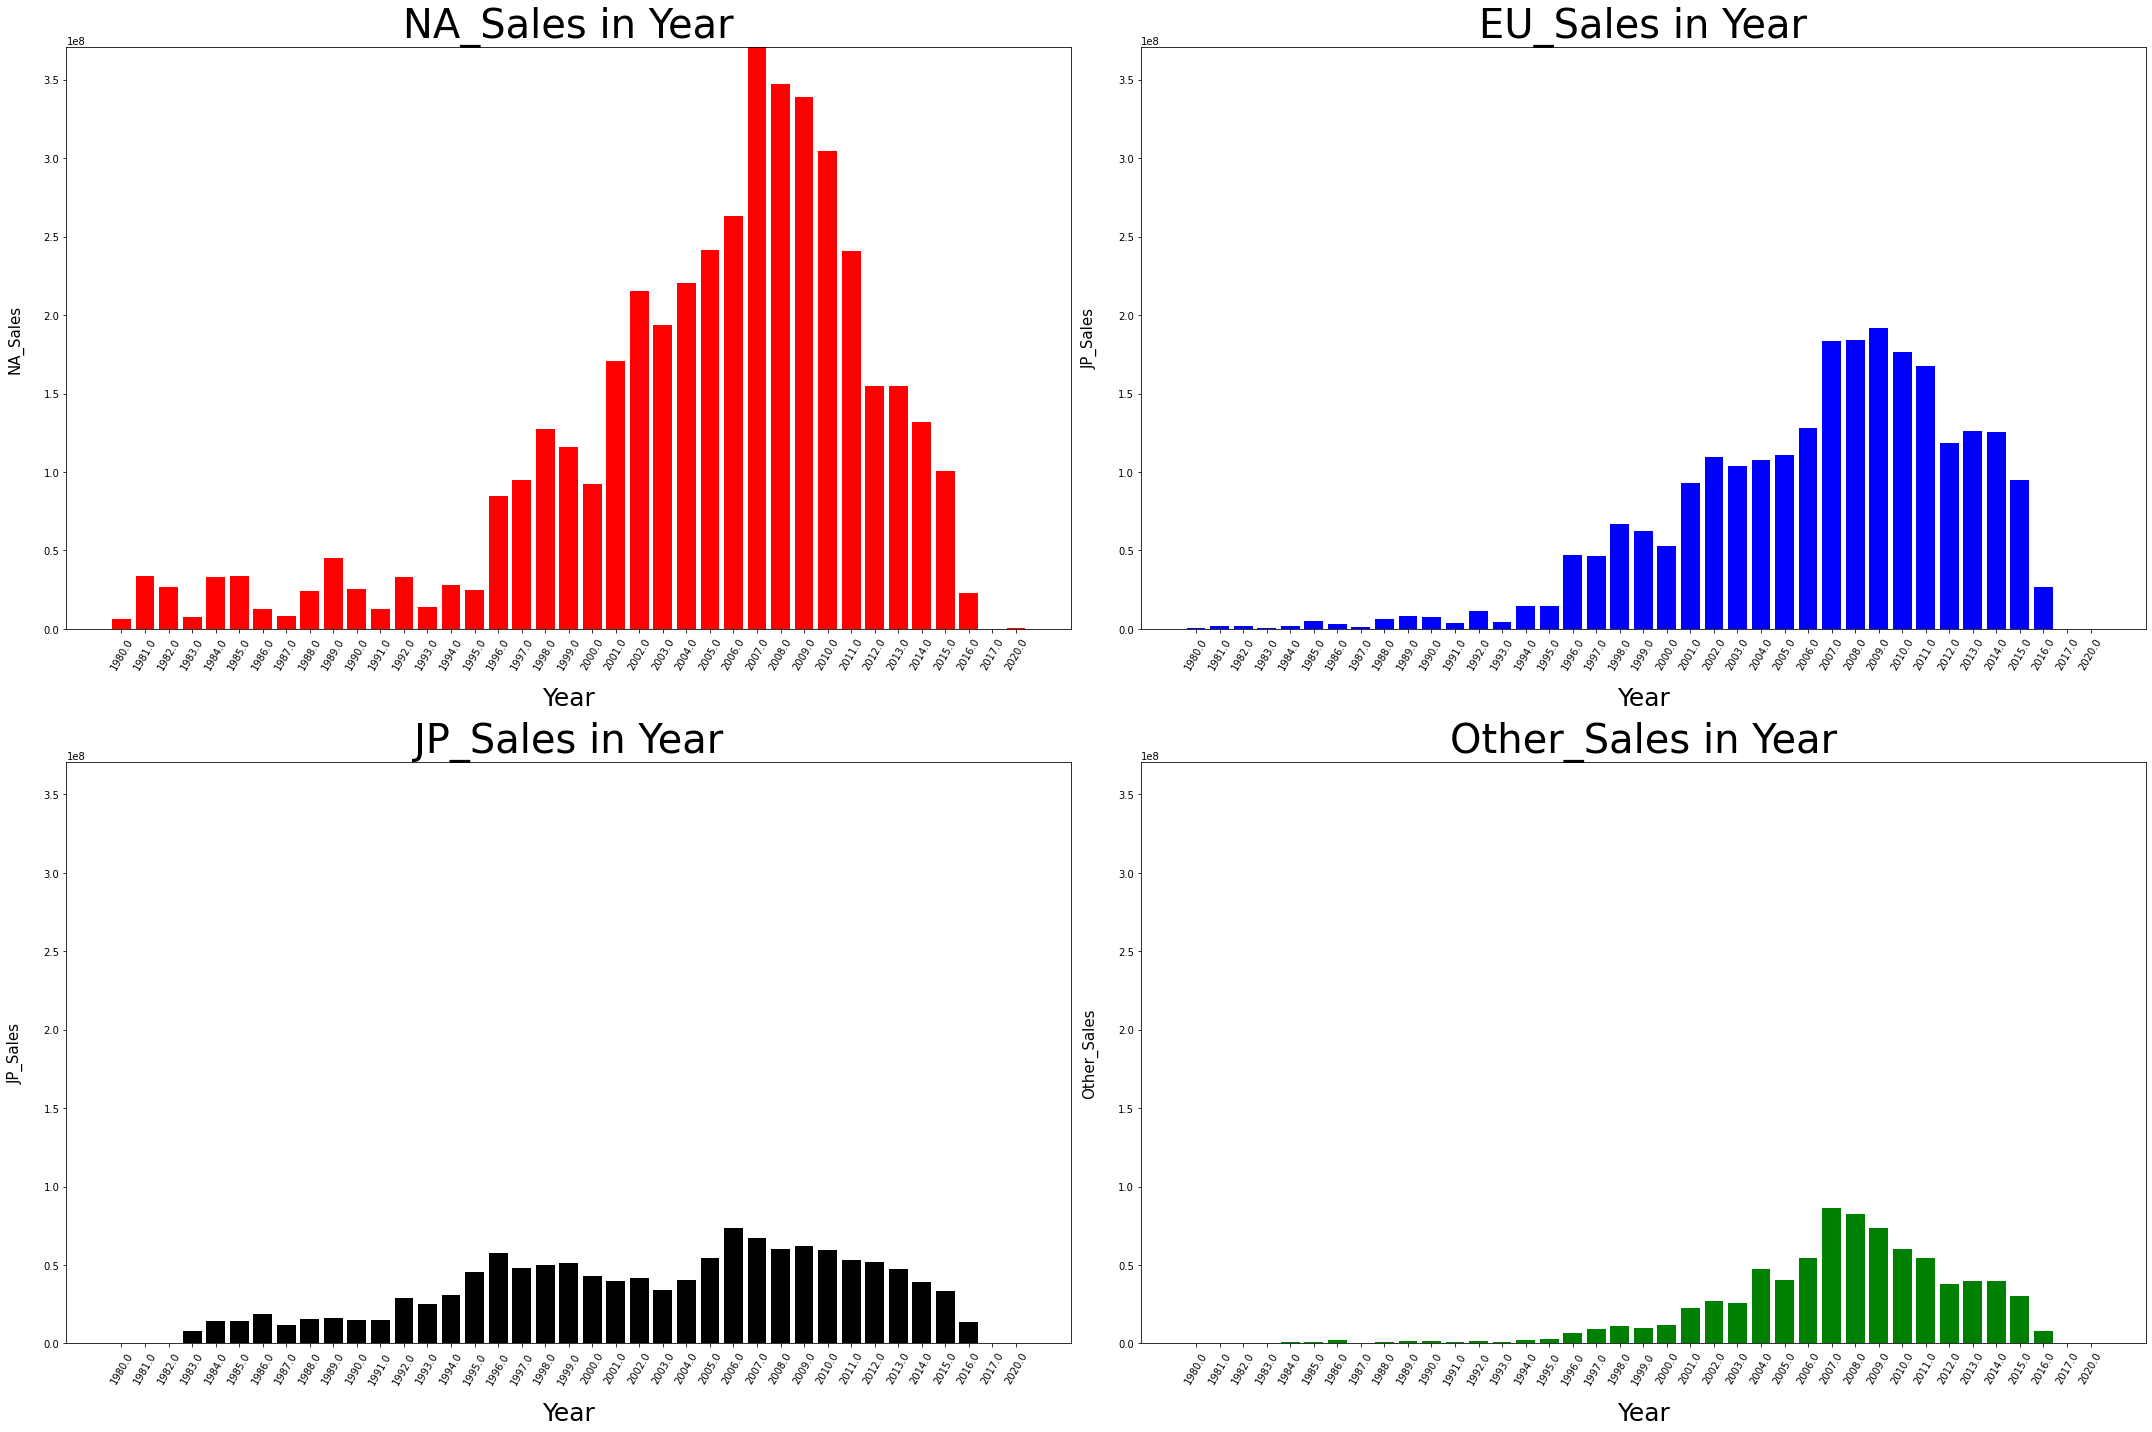

In [39]:
## 시계열 각 지역별 출고량 합계 ##

plt.figure(figsize=(30,20)) ## 전체 도화지 크기
plt.subplot(2,2,1) ## subplot(nrows, ncols, index), 여러 plot을 한꺼번에 표현
# plt.figure(figsize=(20,5))
plt.title('NA_Sales in Year',fontsize=40)
plt.bar(x,value_na,color='r',width=0.8)
plt.xlabel('Year',labelpad = 15,fontsize=25) ## labelpad x축 공백
plt.ylabel('NA_Sales',labelpad = 20,fontsize=15) #labelpad y축 공백
plt.ylim(value_min,value_max) ## y축 최소,최대값을 통일하여 시각화를 통해 직관적으로 인사이트 도출
plt.xticks(x,years,rotation=60)


plt.subplot(2,2,2)
# plt.figure(figsize=(20,5))
plt.title('EU_Sales in Year',fontsize=40)
plt.bar(x,value_eu,color='b',width=0.8)
plt.xlabel('Year',labelpad = 15,fontsize=25) ## labelpad x축 공백
plt.ylabel('JP_Sales',labelpad = 20,fontsize=15) #labelpad y축 공백
plt.ylim(value_min,value_max)
plt.xticks(x,years,rotation=60)

plt.subplot(2,2,3)
# plt.figure(figsize=(20,5))
plt.title('JP_Sales in Year',fontsize=40)
plt.bar(x,value_jp,color='black',width=0.8)
plt.xlabel('Year',labelpad = 15,fontsize=25) ## labelpad x축 공백
plt.ylabel('JP_Sales',labelpad = 20,fontsize=15) #labelpad y축 공백
plt.ylim(value_min,value_max)
plt.xticks(x,years,rotation=60)

plt.subplot(2,2,4)
# plt.figure(figsize=(20,5))
plt.title('Other_Sales in Year',fontsize=40)
plt.bar(x,value_ot,color='g',width=0.8)
plt.xlabel('Year',labelpad = 15,fontsize=25) ## labelpad x축 공백
plt.ylabel('Other_Sales',labelpad = 20,fontsize=15) #labelpad y축 공백
plt.ylim(value_min,value_max)
plt.xticks(x,years,rotation=60)

plt.tight_layout()
plt.show()

In [40]:
##### 연도별 게임의 트렌드
##### 지역에 따라 선호하는 게임 장르가 다를까
##### 출고량이 높은 게임에 대한 시각화

In [41]:
## genre_index - year_index와 맞추기 ##
def group_genre(genre):
  year_index=[]
  gen_year = np.array(df_group.loc[df_group['Genre']==genre,'Year'])
  for year_value in df_year:
    if year_value not in gen_year:
      year_index.append(year_value)
      genre_index = len(gen_year) ## 해당 인덱스 번호에 데이터 삽입
      for i in range(len(year_index)):
        df_group.iloc[genre_index] = [year_index[i],genre,0]
        genre_index +=1
  return df_group.loc[df_group['Genre']==genre,'Total_Sales'].reset_index(drop=True)


##### 연도별 게임의 트렌드 #####
##### 다중 선 그래프 필요 #####
df_group= df.sort_values('Year').groupby(['Year','Genre'],as_index=False)['Total_Sales'].sum()
df_year= df_group.loc[:,'Year'].reset_index(drop=True).unique() ## 연도 추출
df_Action = group_genre('Action')
df_Misc = group_genre('Misc')
df_Shooter = group_genre('Shooter')
df_Platform = group_genre('Platform')
df_Puzzle = group_genre('Puzzle')
df_Racing = group_genre('Racing')
df_Simulation = group_genre('Simulation')
df_Sports = group_genre('Sports')
df_Adventure = group_genre('Adventure')
df_Role_Playing = group_genre('Role-Playing')
df_Strategy = group_genre('Strategy')
df_Fighting = group_genre('Fighting')

# print( df_group.loc[df_group['Genre']=='Action','Year'].reset_index(drop=True)[4])
## X축: 연도, Y축: 출고량, 범례: 장르(색깔) ##

In [42]:
# def group_genre(genre):
#   year_index=[]
#   gen_year = np.array(df_group.loc[df_group['Genre']==genre,'Year'])
#   for year_value in df_year:
#     if year_value not in gen_year:
#       print(year_index)
#       year_index.append(year_value)
#       print(year_index)
#       genre_index = len(gen_year) ## 해당 인덱스 번호에 데이터 삽입
#       for i in range(len(year_index)):
#         df_group.iloc[genre_index] = [year_index[i],genre,0]
#         genre_index +=1
#   return df_group.sort_values('Year',ascending=True).loc[df_group['Genre']==genre,['Year','Total_Sales']].reset_index(drop=True)

# group_genre('Fighting')


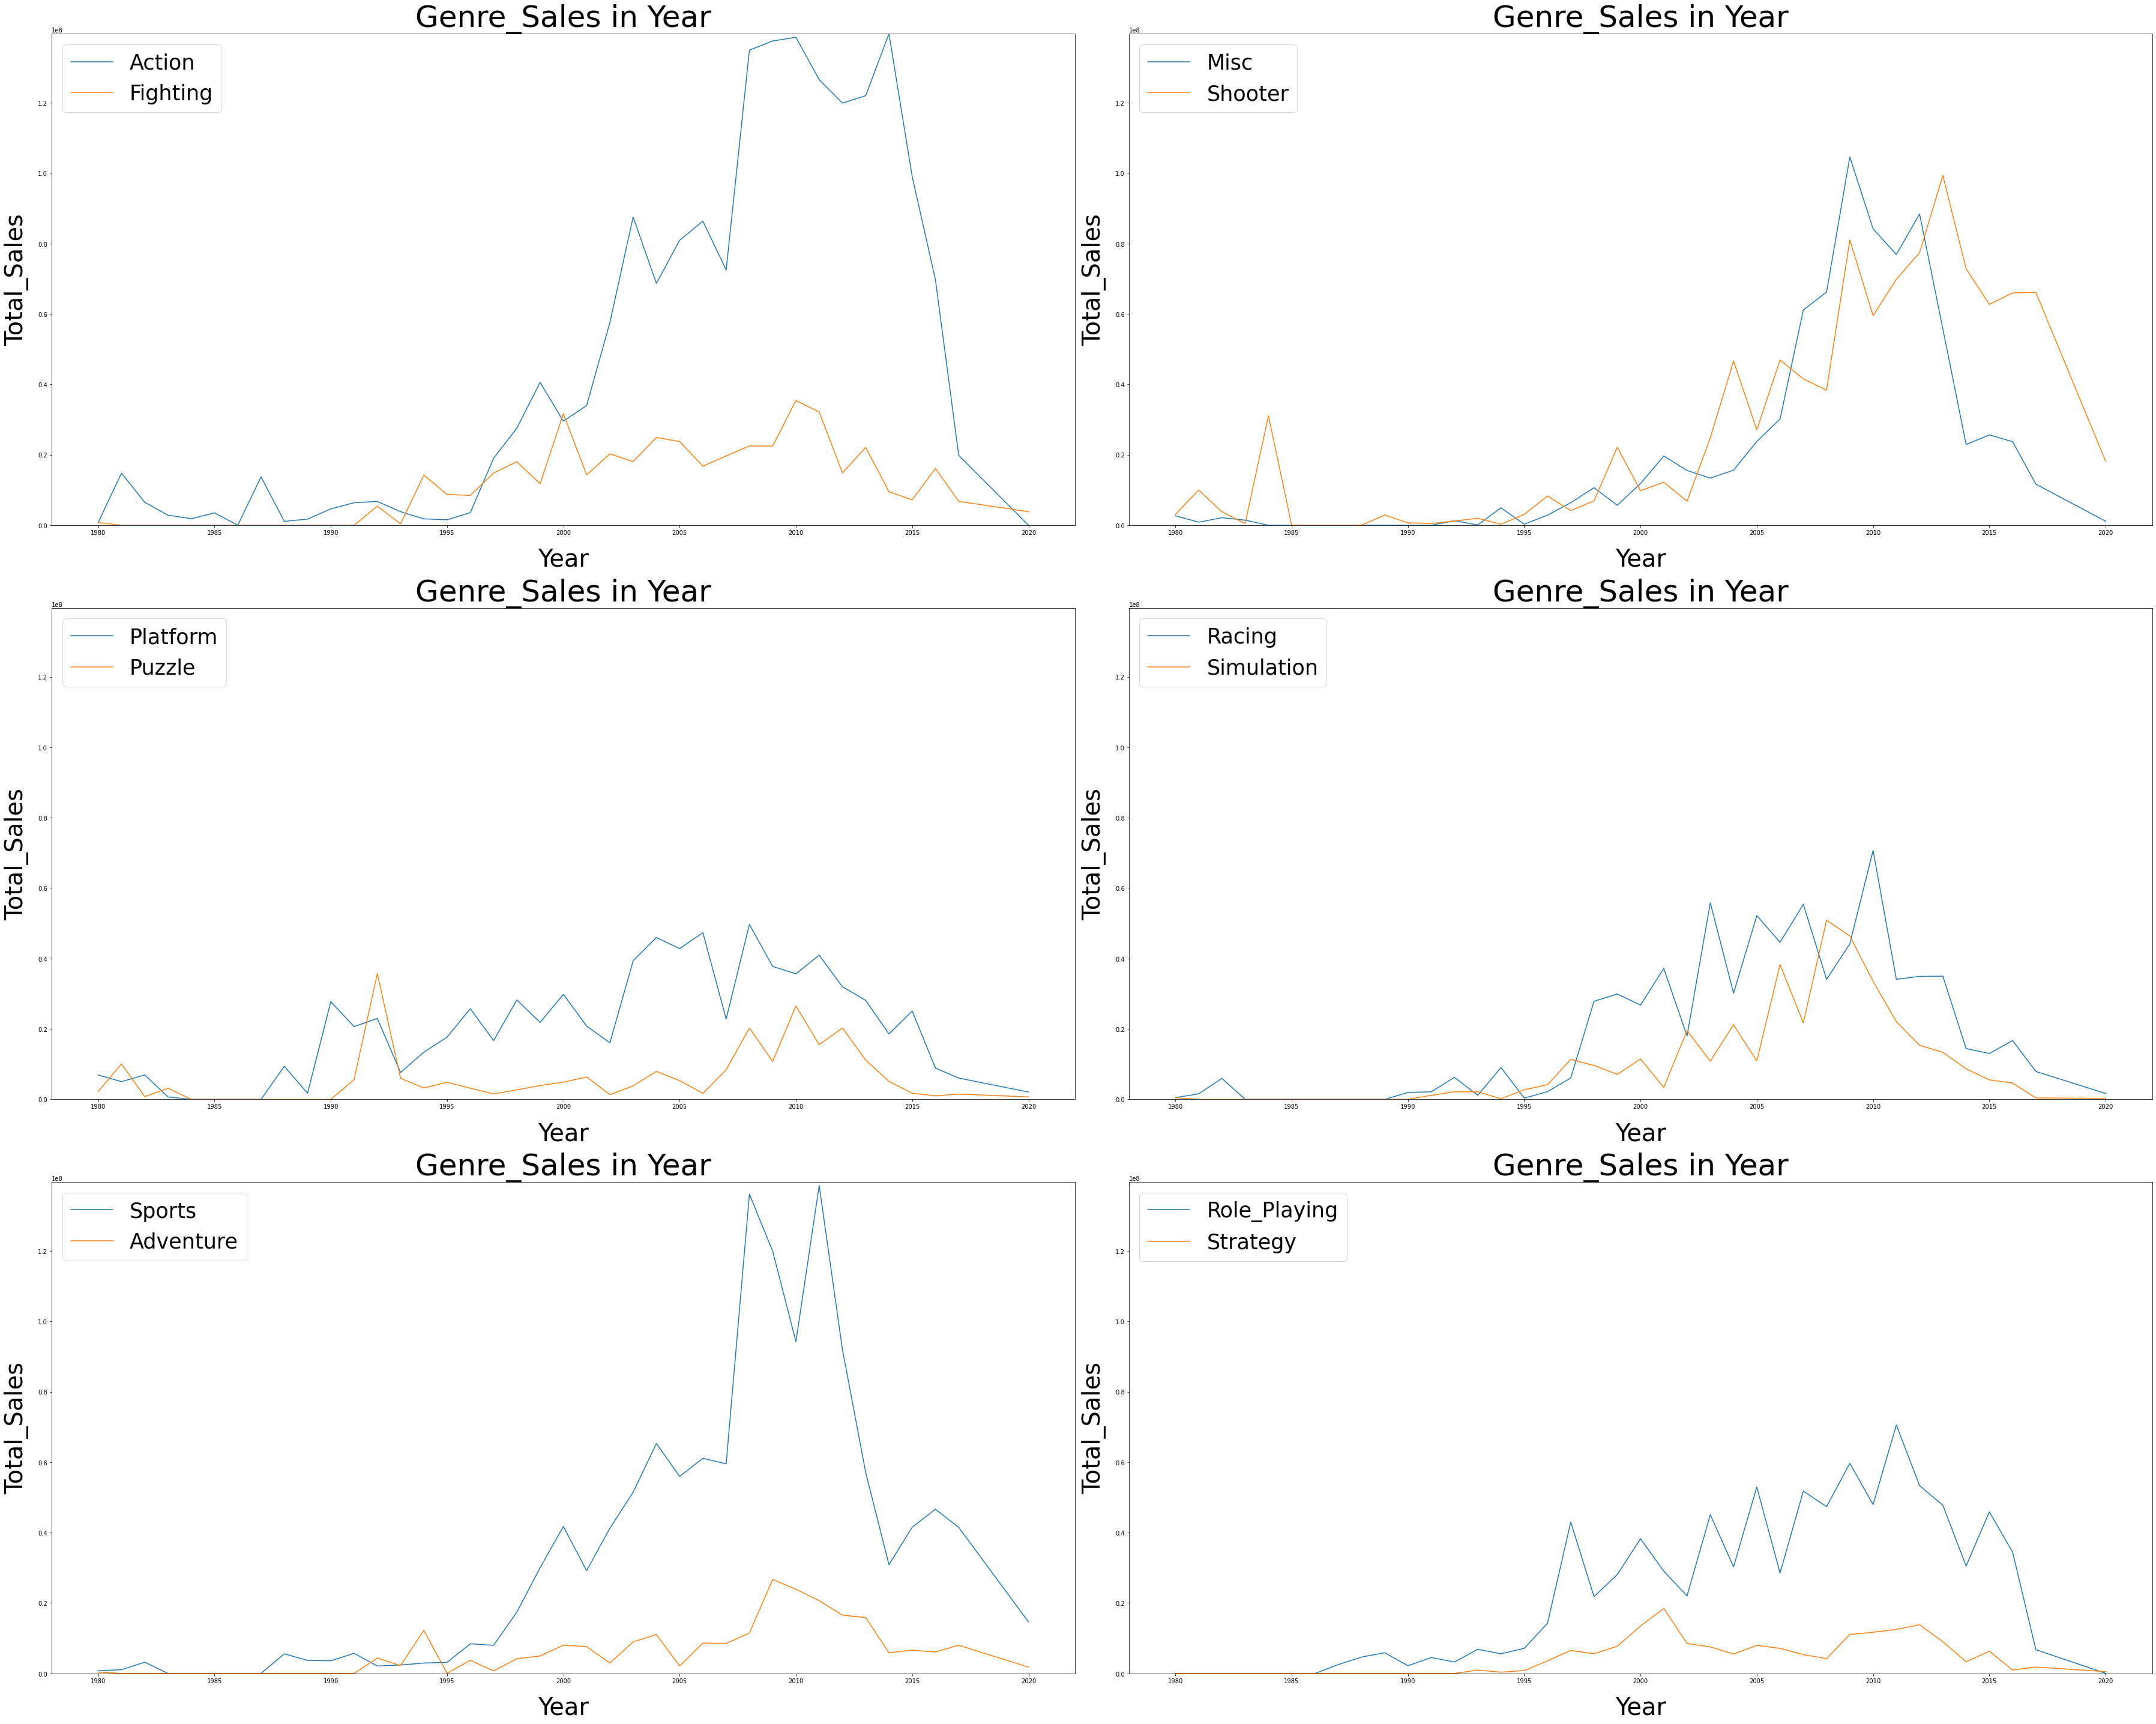

In [43]:
## 연도별 게임 트렌드 분석 ##
plt.figure(figsize=(50,40))
plt.subplot(3,2,1)
plt.title('Genre_Sales in Year', fontsize=50)
plt.plot(df_year,df_Action,label='Action')
plt.plot(df_year,df_Fighting,label='Fighting')
plt.legend(loc='upper left',ncol=1, fontsize= 35)
plt.xlabel('Year', fontsize=40, labelpad=20)
plt.ylabel('Total_Sales',fontsize=40, labelpad=15)
plt.ylim(df_Action.min(),df_Action.max())

plt.subplot(3,2,2)
plt.title('Genre_Sales in Year', fontsize=50)
plt.plot(df_year,df_Misc,label='Misc')
plt.plot(df_year,df_Shooter,'-',label='Shooter')
plt.legend(loc='upper left',ncol=1, fontsize= 35)
plt.xlabel('Year', fontsize=40, labelpad=20)
plt.ylabel('Total_Sales',fontsize=40, labelpad=15)
plt.ylim(df_Action.min(),df_Action.max())

plt.subplot(3,2,3)
plt.title('Genre_Sales in Year', fontsize=50)
plt.plot(df_year,df_Platform,'-',label='Platform')
plt.plot(df_year,df_Puzzle,'-',label='Puzzle')
plt.legend(loc='upper left',ncol=1, fontsize= 35)
plt.xlabel('Year', fontsize=40, labelpad=20)
plt.ylabel('Total_Sales',fontsize=40, labelpad=15)
plt.ylim(df_Action.min(),df_Action.max())

plt.subplot(3,2,4)
plt.title('Genre_Sales in Year', fontsize=50)
plt.plot(df_year,df_Racing,'-',label='Racing')
plt.plot(df_year,df_Simulation,'-',label='Simulation')
plt.legend(loc='upper left',ncol=1, fontsize= 35)
plt.xlabel('Year', fontsize=40, labelpad=20)
plt.ylabel('Total_Sales',fontsize=40, labelpad=15)
plt.ylim(df_Action.min(),df_Action.max())

plt.subplot(3,2,5)
plt.title('Genre_Sales in Year', fontsize=50)
plt.plot(df_year,df_Sports,'-',label='Sports')
plt.plot(df_year,df_Adventure,'-',label='Adventure')
plt.legend(loc='upper left',ncol=1, fontsize= 35)
plt.xlabel('Year', fontsize=40, labelpad=20)
plt.ylabel('Total_Sales',fontsize=40, labelpad=15)
plt.ylim(df_Action.min(),df_Action.max())

plt.subplot(3,2,6)
plt.title('Genre_Sales in Year', fontsize=50)
plt.plot(df_year,df_Role_Playing,'-',label='Role_Playing')
plt.plot(df_year,df_Strategy,'-',label='Strategy')
plt.legend(loc='upper left',ncol=1, fontsize= 35)
plt.xlabel('Year', fontsize=40, labelpad=20)
plt.ylabel('Total_Sales',fontsize=40, labelpad=15)
plt.ylim(df_Action.min(),df_Action.max())

plt.tight_layout()
plt.show()


## 시계열에 따른 게임 트렌드 ##
## Action >> Sports >> Shooter >> Misc

In [44]:
## 시계열과 장르별 출고량에 따른 상관관계 분석 ##
corr_action = np.corrcoef(df_year,df_Action)[0,1]
corr_fighting = np.corrcoef(df_year,df_Fighting)[0,1]
corr_misc = np.corrcoef(df_year,df_Misc)[0,1]
corr_shooter = np.corrcoef(df_year,df_Shooter)[0,1]
corr_platform = np.corrcoef(df_year,df_Platform)[0,1]
corr_puzzle = np.corrcoef(df_year,df_Puzzle)[0,1]
corr_racing = np.corrcoef(df_year,df_Racing)[0,1]
corr_simulation = np.corrcoef(df_year,df_Simulation)[0,1]
corr_sports = np.corrcoef(df_year,df_Sports)[0,1]
corr_adventure = np.corrcoef(df_year,df_Adventure)[0,1]
corr_role = np.corrcoef(df_year,df_Role_Playing)[0,1]
corr_strategy = np.corrcoef(df_year,df_Strategy)[0,1]

answer = np.array([corr_action,corr_fighting,corr_misc,corr_shooter,corr_platform,corr_puzzle,corr_racing,corr_simulation,corr_sports,corr_strategy,corr_adventure,corr_role]).round(3)
gen_answer = df_group.Genre.unique()
j=0
for co_answer in answer:
  print('시계열과 {}장르의 상관관계: {}'.format(gen_answer[j],co_answer))
  j += 1

## 시계열에 따른 게임 트렌드 ##  Action >> Sports >> Shooter >> Misc
## 시계열 트렌드에 따른 게임 장르는 Shooter >> Action >> Role-Playing >> Sports

시계열과 Action장르의 상관관계: 0.72
시계열과 Fighting장르의 상관관계: 0.632
시계열과 Misc장르의 상관관계: 0.606
시계열과 Shooter장르의 상관관계: 0.785
시계열과 Platform장르의 상관관계: 0.514
시계열과 Puzzle장르의 상관관계: 0.249
시계열과 Racing장르의 상관관계: 0.574
시계열과 Simulation장르의 상관관계: 0.495
시계열과 Sports장르의 상관관계: 0.681
시계열과 Adventure장르의 상관관계: 0.535
시계열과 Strategy장르의 상관관계: 0.629
시계열과 Role-Playing장르의 상관관계: 0.698


In [46]:
df.sort_values('Genre',ascending=True)[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].reset_index(drop=True)


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,40000.0,0,0,0
1,Action,600000.0,1310000.0,80000.0,520000.0
2,Action,10000.0,0,0,0
3,Action,0,70000.0,0,0
4,Action,540000.0,280000.0,0,130000.0
...,...,...,...,...,...
16593,Strategy,0,0,140000.0,0
16594,Strategy,0,30000.0,0,10000.0
16595,Strategy,0,0,100000.0,0
16596,Strategy,50000.0,40000.0,0,10000.0


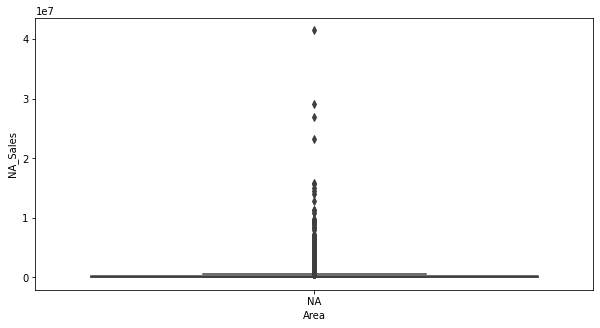

In [47]:
## 지역별 게임장르 T-test ##
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


plt.figure(figsize=(10,5))
sns.boxplot(x='Area',y='NA_Sales',data=con_NA)
plt.show()


## 시계열에 따른 게임 트렌드 ##  Action >> Sports >> Shooter
## 시계열 트렌드에 따른 게임 장르는 Shooter >> Action >> Sports

## two-sample test -> stats.tteset_ind(n1, n2)
# genre_array = np.array(df.sort_values('NA_Sales').loc[:,'Genre'].unique())
# NA_ac=df.sort_values('NA_Sales').loc[df['Genre']=='Action','NA_Sales']
# NA_soo=df.sort_values('NA_Sales').loc[df['Genre']=='Sooter','NA_Sales']
# NA_spo=df.sort_values('NA_Sales').loc[df['Genre']=='Sportsr','NA_Sales']

# EU_ac=df.sort_values('NA_Sales').loc[df['Genre']=='Action','EU_Sales']
# JP_ac=df.sort_values('NA_Sales').loc[df['Genre']=='Action','JP_Sales']
# Other_ac=df.sort_values('NA_Sales').loc[df['Genre']=='Action','Other_Sales']

# F_statistic, pVal = stats.f_oneway(NA_ac, EU_ac, JP_ac, Other_ac)

# print('ANOVA 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
# if pVal < 0.05:
#     print('P-value가 충분히 작기 때문에 그룹 평균값이 통계적으로 유의하게 차이납니다.')

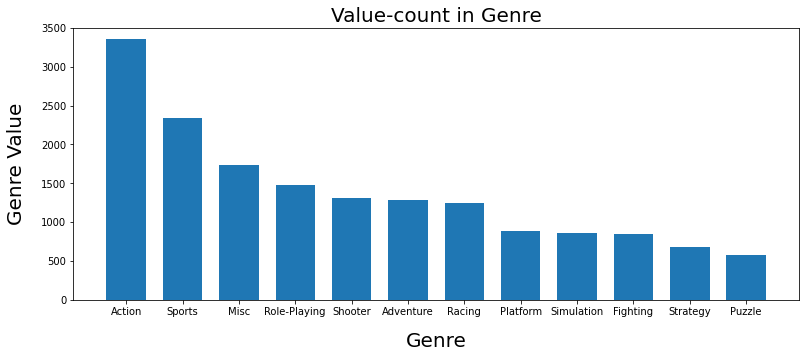

In [77]:
a= df['Genre'].value_counts().index.to_list()
b= df['Genre'].value_counts().to_list()

plt.figure(figsize=(13,5))
plt.title('Value-count in Genre',fontsize=20)
plt.bar(a,b,width=0.7)
plt.xlabel('Genre',fontsize=20,labelpad=15)
plt.ylabel('Genre Value',fontsize=20,labelpad=15)
plt.ylim(0, 3500)

plt.show()

In [87]:
## 출고량이 많은 게임들에 대한 분석 = Misc ##
df.sort_values('Total_Sales',ascending=False)[df['Genre']=='Misc'].head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3015,Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
4344,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970000.0,4940000.0,240000.0,1670000.0,21820000.0
13230,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4750000.0,9260000.0,4160000.0,2050000.0,20220000.0
224,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6050000.0,3150000.0,0,1070000.0,10270000.0
9231,Just Dance 2,Wii,2010.0,Misc,Ubisoft,5840000.0,2890000.0,10000.0,780000.0,9520000.0
9995,Minecraft,X360,2013.0,Misc,Microsoft Game Studios,5580000.0,2830000.0,20000.0,770000.0,9200000.0
7702,Mario Party DS,DS,2007.0,Misc,Nintendo,4460000.0,1880000.0,1980000.0,700000.0,9020000.0
15266,Mario Party 8,Wii,2007.0,Misc,Nintendo,3810000.0,2300000.0,1580000.0,730000.0,8420000.0
11300,Just Dance,Wii,2009.0,Misc,Ubisoft,3510000.0,3030000.0,0,730000.0,7270000.0
6553,Just Dance 4,Wii,2012.0,Misc,Ubisoft,4140000.0,2210000.0,0,560000.0,6910000.0


In [48]:
## 출고량 높은 게임에 대한 분석 ##
high_sales = df.sort_values('Total_Sales',ascending=False)[['Name','Platform','Genre','Publisher','Year','Total_Sales']].reset_index(drop=True).head(30)
high_sales

,Name,Platform,Genre,Publisher,Year,Total_Sales
0,Wii Sports,Wii,Sports,Nintendo,2006.0,82740000.0
1,Super Mario Bros.,NES,Platform,Nintendo,1985.0,40240000.0
2,Mario Kart Wii,Wii,Racing,Nintendo,2008.0,35830000.0
3,Wii Sports Resort,Wii,Sports,Nintendo,2009.0,33000000.0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,1996.0,30381000.0
5,Tetris,GB,Puzzle,Nintendo,1989.0,30260000.0
6,New Super Mario Bros.,DS,Platform,Nintendo,2006.0,30010000.0
7,Wii Play,Wii,Misc,Nintendo,2006.0,29010000.0
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,2009.0,28610000.0
9,Duck Hunt,NES,Shooter,Nintendo,1984.0,28310000.0


In [139]:
## 출고량이 많은 게임들에 대한 분석 = Action ##
df.sort_values('Total_Sales',ascending=False).loc[df['Genre']=='Action',['Name','Platform','Genre','Publisher','Year','Total_Sales']].reset_index(drop=True).head(20)

,Name,Platform,Genre,Publisher,Year,Total_Sales
0,Grand Theft Auto V,PS3,Action,Take-Two Interactive,2013.0,21390000.0
1,Grand Theft Auto: San Andreas,PS2,Action,Take-Two Interactive,2004.0,20810000.0
2,Grand Theft Auto V,X360,Action,Take-Two Interactive,2013.0,16380000.0
3,Grand Theft Auto: Vice City,PS2,Action,Take-Two Interactive,2002.0,16150000.0
4,Pokemon X/Pokemon Y,3DS,Action,Nintendo,2013.0,14350000.0
5,Grand Theft Auto III,PS2,Action,Take-Two Interactive,2001.0,13100000.0
6,Grand Theft Auto V,PS4,Action,Take-Two Interactive,2014.0,11990000.0
7,Pokemon HeartGold/Pokemon SoulSilver,DS,Action,Nintendo,2009.0,11900000.0
8,Grand Theft Auto IV,X360,Action,Take-Two Interactive,2008.0,11030000.0
9,Grand Theft Auto IV,PS3,Action,Take-Two Interactive,2008.0,10580000.0


In [155]:
## 출고량이 많은 게임들에 대한 분석 = Platform ##
df.sort_values('Total_Sales',ascending=False).loc[df['Genre']=='Platform',['Name','Platform','Genre','Publisher','Year','Total_Sales']].reset_index(drop=True).head(10)

,Name,Platform,Genre,Publisher,Year,Total_Sales
0,Super Mario Bros.,NES,Platform,Nintendo,1985.0,40240000.0
1,New Super Mario Bros.,DS,Platform,Nintendo,2006.0,30010000.0
2,New Super Mario Bros. Wii,Wii,Platform,Nintendo,2009.0,28610000.0
3,Super Mario World,SNES,Platform,Nintendo,1990.0,20620000.0
4,Super Mario Land,GB,Platform,Nintendo,1989.0,18140000.0
5,Super Mario Bros. 3,NES,Platform,Nintendo,1988.0,17280000.0
6,Super Mario 64,N64,Platform,Nintendo,1996.0,11900000.0
7,Super Mario Galaxy,Wii,Platform,Nintendo,2007.0,11520000.0
8,Super Mario 3D Land,3DS,Platform,Nintendo,2011.0,10790000.0
9,Super Mario All-Stars,SNES,Platform,Nintendo,1993.0,10550000.0


In [140]:
## 출고량이 많은 게임들에 대한 분석 = Role-Playing ##
df.sort_values('Total_Sales',ascending=False).loc[df['Genre']=='Role-Playing',['Name','Platform','Genre','Publisher','Year','Total_Sales']].reset_index(drop=True).head(20)

,Name,Platform,Genre,Publisher,Year,Total_Sales
0,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,1996.0,30381000.0
1,Pokemon Diamond/Pokemon Pearl,DS,Role-Playing,Nintendo,2006.0,18350000.0
2,Pokemon Ruby/Pokemon Sapphire,GBA,Role-Playing,Nintendo,2002.0,15840000.0
3,Pokemon Black/Pokemon White,DS,Role-Playing,Nintendo,2010.0,15320000.0
4,Pokémon Yellow: Special Pikachu Edition,GB,Role-Playing,Nintendo,1998.0,14640000.0
5,Pokemon Gold/Pokemon Silver,GB,Role-Playing,Nintendo,1999.0,14099000.0
6,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,Nintendo,2014.0,11330000.0
7,Pokemon FireRed/Pokemon LeafGreen,GBA,Role-Playing,Nintendo,2004.0,10490000.0
8,Final Fantasy VII,PS,Role-Playing,Sony Computer Entertainment,1997.0,9720000.0
9,The Elder Scrolls V: Skyrim,X360,Role-Playing,Bethesda Softworks,2011.0,8840000.0


In [141]:
## 출고량이 많은 게임들에 대한 분석 = Sports ##
df.sort_values('Total_Sales',ascending=False).loc[df['Genre']=='Sports',['Name','Platform','Genre','Publisher','Year','Total_Sales']].reset_index(drop=True).head(20)

,Name,Platform,Genre,Publisher,Year,Total_Sales
0,Wii Sports,Wii,Sports,Nintendo,2006.0,82740000.0
1,Wii Sports Resort,Wii,Sports,Nintendo,2009.0,33000000.0
2,Wii Fit,Wii,Sports,Nintendo,2007.0,22720000.0
3,Wii Fit Plus,Wii,Sports,Nintendo,2009.0,22000000.0
4,FIFA 16,PS4,Sports,Electronic Arts,2015.0,8490000.0
5,Mario & Sonic at the Olympic Games,Wii,Sports,Sega,2007.0,8050000.0
6,FIFA 14,PS3,Sports,Electronic Arts,2013.0,6900000.0
7,Zumba Fitness,Wii,Sports,505 Games,2010.0,6810000.0
8,FIFA 12,PS3,Sports,Electronic Arts,2011.0,6690000.0
9,FIFA 15,PS4,Sports,Electronic Arts,2014.0,6600000.0


In [142]:
## 출고량이 많은 게임들에 대한 분석 = Shooter ##
df.sort_values('Total_Sales',ascending=False).loc[df['Genre']=='Shooter',['Name','Platform','Genre','Publisher','Year','Total_Sales']].reset_index(drop=True).head(20)

,Name,Platform,Genre,Publisher,Year,Total_Sales
0,Duck Hunt,NES,Shooter,Nintendo,1984.0,28310000.0
1,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,2011.0,14760000.0
2,Call of Duty: Black Ops,X360,Shooter,Activision,2010.0,14640000.0
3,Call of Duty: Black Ops 3,PS4,Shooter,Activision,2015.0,14240000.0
4,Call of Duty: Black Ops II,PS3,Shooter,Activision,2012.0,14040000.0
5,Call of Duty: Black Ops II,X360,Shooter,Activision,2012.0,13740000.0
6,Call of Duty: Modern Warfare 2,X360,Shooter,Activision,2009.0,13520000.0
7,Call of Duty: Modern Warfare 3,PS3,Shooter,Activision,2011.0,13470000.0
8,Call of Duty: Black Ops,PS3,Shooter,Activision,2010.0,12730000.0
9,Halo 3,X360,Shooter,Microsoft Game Studios,2007.0,12140000.0


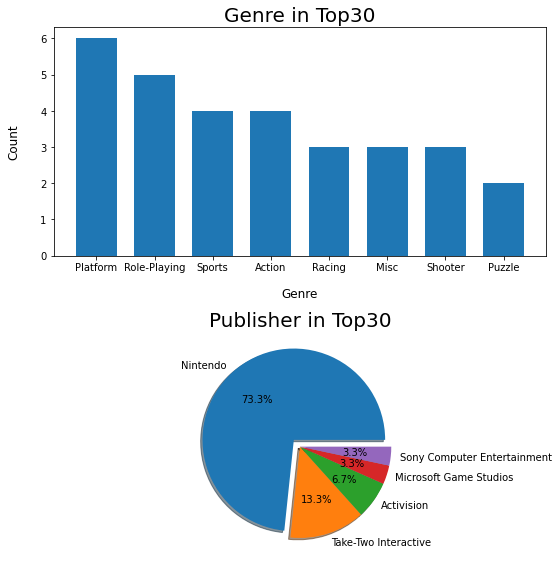

In [153]:
## 출고량이 많은 게임들에 대한 시각적 분석##

## Publisher별 Count수의 index를 list로 변환
high_pub_label = high_sales.Publisher.value_counts().index.to_list() # to_list: Series를 list형식으로 변환
## Publisher별 Count수를 list로 변환
high_pub_count = high_sales.Publisher.value_counts().to_list() #to_list: Series를 list형식으로 변환
## Pie 차트 큰 부분 강조
explode = [0.1, 0, 0, 0, 0]

## Genre별 Count수의 index를 list로 변환
xaxis_high = high_sales.Genre.value_counts().index.to_list() # to_list: Series를 list형식으로 변환
## Genre별 Count수를 list로 변환 
yaxis_high = high_sales.Genre.value_counts().to_list() #to_list: Series를 list형식으로 변환

## pie 차트의 x값과, label 값은 list 형식으로 부여해야 Error 생기지 않음 ##
## Genre에 빈도수를 list형식으로 모두 전환하여 변수에 저장 ##
plt.figure(figsize=(8,8))
plt.subplot(2,1,2)
plt.title('Publisher in Top30',fontsize=20)
plt.pie(high_pub_count,labels = high_pub_label,autopct='%.1f%%', explode=explode,shadow=True) ## autopct: 소수점 한자리까지 표현

plt.subplot(2,1,1)
plt.title('Genre in Top30',fontsize=20)
plt.bar(xaxis_high, yaxis_high,width=0.7)
plt.xlabel('Genre',fontsize=12,labelpad=15)
plt.ylabel('Count',fontsize=12,labelpad=20)

plt.tight_layout()
plt.show()

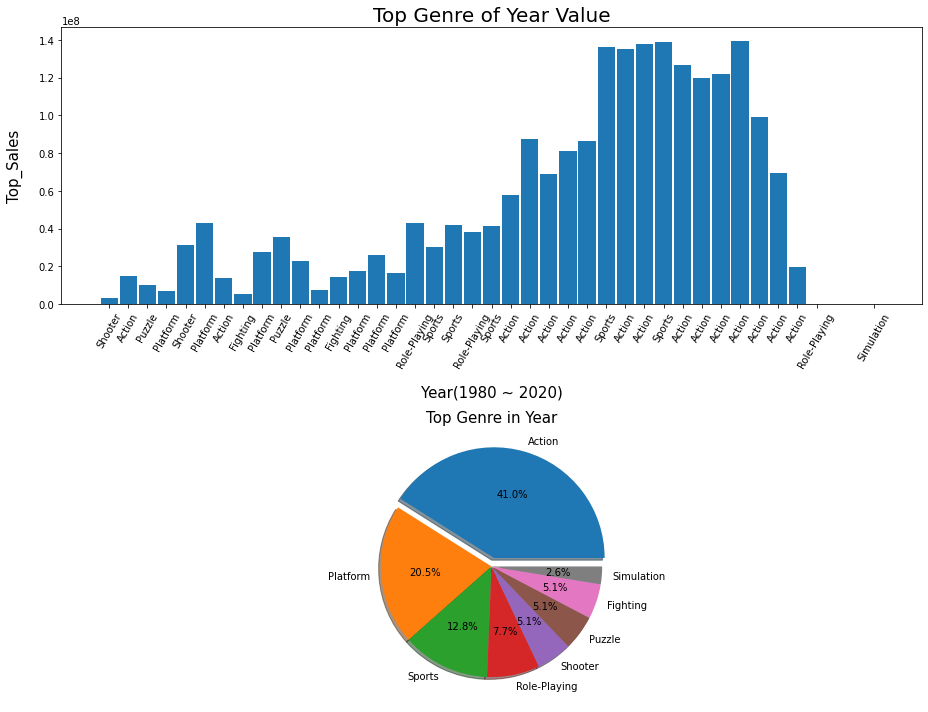

In [147]:
## 매 연도별 TOP Genre 출고량 ##

top_year = df.sort_values('Year',ascending=True).groupby(['Year','Genre'],as_index=False)[['Total_Sales']].sum().reset_index(drop=True)
year_top_genre = top_year[top_year.groupby('Year')['Total_Sales'].transform(max)==top_year.Total_Sales].reset_index(drop=True) ## groupby - transform(연산자)를 사용하면 groupby친 DataFrame에서 aggfunc 사용가능

year_top = np.array(year_top_genre.Year)
genre_top = np.array(year_top_genre.Genre) ## label
total_top = np.array(year_top_genre.Total_Sales)
# print(year_top)
# print(genre_top)

## 연도별 인기장르 bar 시각화 ##
plt.figure(figsize=(13,10))
plt.subplot(2,1,1)
plt.title('Top Genre of Year Value',fontsize=20)
plt.bar(year_top,total_top, width=0.9)
plt.xlabel('Year(1980 ~ 2020)',fontsize=15,labelpad=15)
plt.ylabel('Top_Sales',fontsize=15,labelpad=15)
plt.xticks(year_top,genre_top,rotation=60)

## 연도별 인기장르 Pie 차트 시각화 ##
top_genre_list = year_top_genre.Genre.value_counts().index.to_list()
top_genre_value = year_top_genre.Genre.value_counts().to_list()
explode = [0.08, 0, 0, 0, 0,0,0,0]

plt.subplot(2,1,2)
plt.title('Top Genre in Year', fontsize=15)
plt.pie(top_genre_value, labels=top_genre_list, data=year_top_genre, autopct='%.1f%%',explode=explode,shadow=True)

plt.tight_layout()
plt.show()

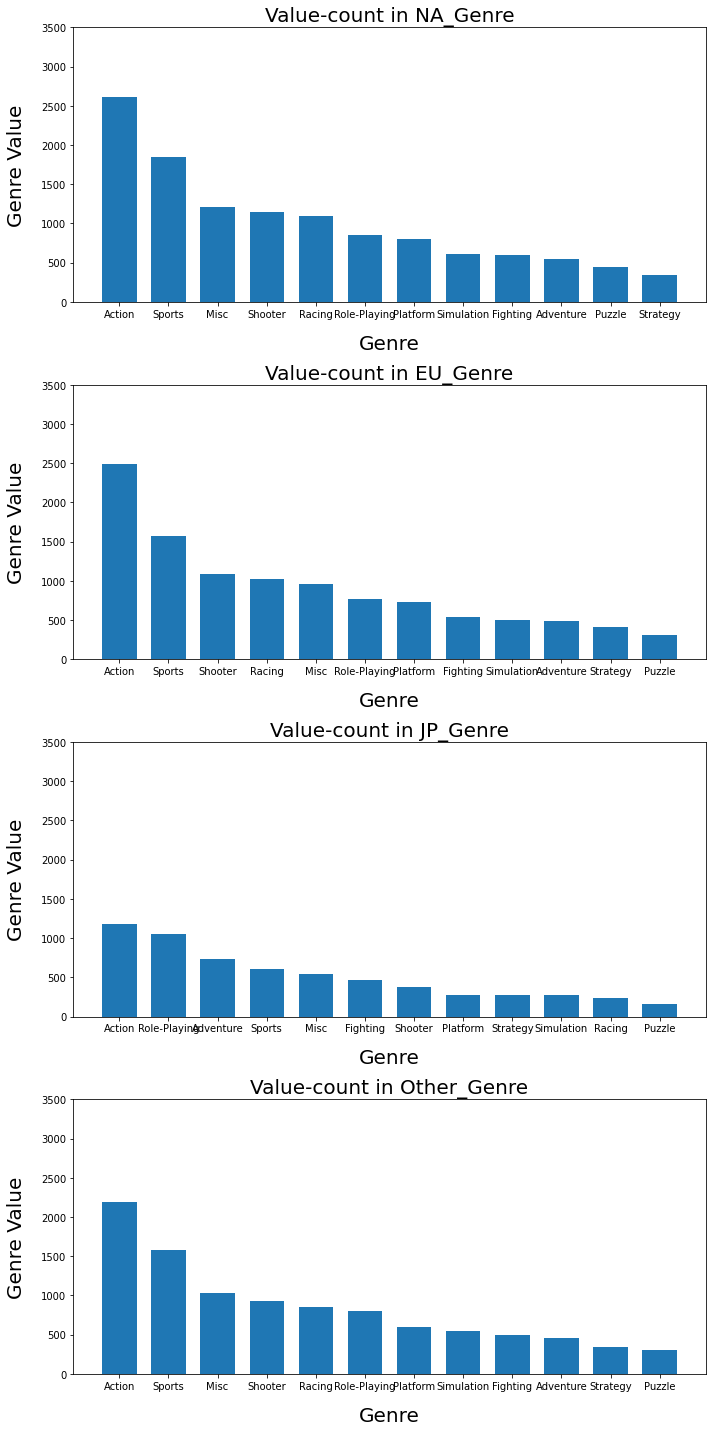

In [88]:
## 지역에 따라 선호하는 장르가 다를까 ##
NA_a= df.loc[df['NA_Sales'] != 0,'Genre'].value_counts().index.to_list()
NA_b= df.loc[df['NA_Sales'] != 0,'Genre'].value_counts().to_list()

EU_a= df.loc[df['EU_Sales'] != 0,'Genre'].value_counts().index.to_list()
EU_b= df.loc[df['EU_Sales'] != 0,'Genre'].value_counts().to_list()

JP_a= df.loc[df['JP_Sales'] != 0,'Genre'].value_counts().index.to_list()
JP_b= df.loc[df['JP_Sales'] != 0,'Genre'].value_counts().to_list()

Other_a= df.loc[df['Other_Sales'] != 0,'Genre'].value_counts().index.to_list()
Other_b= df.loc[df['Other_Sales'] != 0,'Genre'].value_counts().to_list()

plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
plt.title('Value-count in NA_Genre',fontsize=20)
plt.bar(NA_a,NA_b,width=0.7)
plt.xlabel('Genre',fontsize=20,labelpad=15)
plt.ylabel('Genre Value',fontsize=20,labelpad=15)
plt.ylim(0, 3500)

plt.subplot(4,1,2)
plt.title('Value-count in EU_Genre',fontsize=20)
plt.bar(EU_a,EU_b,width=0.7)
plt.xlabel('Genre',fontsize=20,labelpad=15)
plt.ylabel('Genre Value',fontsize=20,labelpad=15)
plt.ylim(0, 3500)

plt.subplot(4,1,3)
plt.title('Value-count in JP_Genre',fontsize=20)
plt.bar(JP_a,JP_b,width=0.7)
plt.xlabel('Genre',fontsize=20,labelpad=15)
plt.ylabel('Genre Value',fontsize=20,labelpad=15)
plt.ylim(0, 3500)

plt.subplot(4,1,4)
plt.title('Value-count in Other_Genre',fontsize=20)
plt.bar(Other_a,Other_b,width=0.7)
plt.xlabel('Genre',fontsize=20,labelpad=15)
plt.ylabel('Genre Value',fontsize=20,labelpad=15)
plt.ylim(0, 3500)

plt.tight_layout()
plt.show()

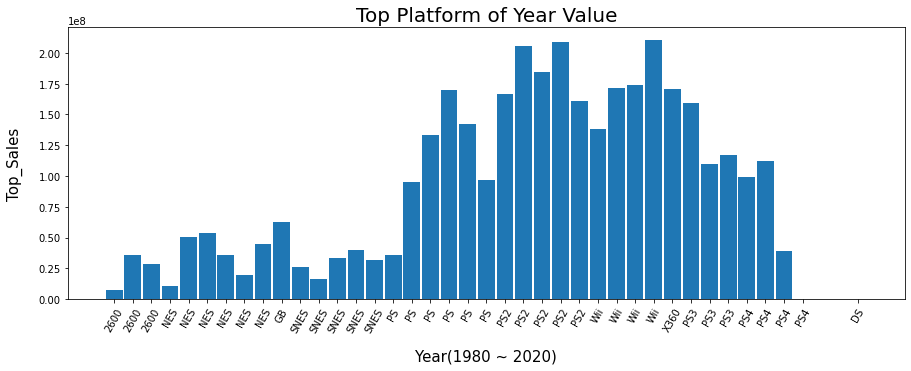

In [99]:
## 연도별 인기플랫폼 bar 시각화 ##

top_Platform = df.sort_values('Year',ascending=True).groupby(['Year','Platform'],as_index=False)[['Total_Sales']].sum().reset_index(drop=True)
year_top_Plat = top_Platform[top_Platform.groupby('Year')['Total_Sales'].transform(max)==top_Platform.Total_Sales].reset_index(drop=True) ## groupby - transform(연산자)를 사용하면 groupby친 DataFrame에서 aggfunc 사용가능
year_top_Plat

year_top_plat = np.array(year_top_Plat.Year)
genre_top_plat = np.array(year_top_Plat.Platform) ## label
total_top_plat = np.array(year_top_Plat.Total_Sales)

plt.figure(figsize=(15,5))
plt.title('Top Platform of Year Value',fontsize=20)
plt.bar(year_top_plat,total_top_plat, width=0.9)
plt.xlabel('Year(1980 ~ 2020)',fontsize=15,labelpad=15)
plt.ylabel('Top_Sales',fontsize=15,labelpad=15)
plt.xticks(year_top,genre_top_plat,rotation=60)

plt.show()


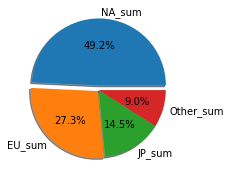

In [127]:
## 출고량 시장Pie ##
NA_sum = df.NA_Sales.sum()
EU_sum = df.EU_Sales.sum()
JP_sum = df.JP_Sales.sum()
Other_sum = df.Other_Sales.sum()
Total_sum = df.Total_Sales.sum()

names = np.array(['NA_sum','EU_sum','JP_sum','Other_sum'])
values = np.array([NA_sum,EU_sum,JP_sum,Other_sum])
explode = [0.07,0.02,0,0,]

df_sum = pd.DataFrame({'Sales_name': names,
                       'Sales_value': values})

plt.figure(figsize=(3,5))
# plt.title('TotalGame Market',fontsize=15)
plt.pie(values,labels=names,data=df_sum,autopct='%.1f%%', explode=explode,shadow=True)
plt.show()